# Task 2: Data Cleaning and Insight Generation from Survey Data  
**Internship Project – Elevvo Pathways**  
**Author:** Ayesha Nadeem  
**Date:** 17 August 2025  

## Introduction  
This task focuses on cleaning and analyzing real-world survey data from the **Kaggle Data Science Survey (2017–2021)**.  
The dataset includes missing values, duplicates, and inconsistencies that must be addressed before deriving insights.  

The workflow includes:  
- Handling missing values, duplicates, and formatting issues  
- Applying label encoding or mapping to categorical variables  
- Cleaning and standardizing demographic fields such as age, gender, and job title  
- Extracting meaningful insights into respondent behavior and preferences  

## Objective  
The objective is to build a clean dataset and generate insights into the demographics, skills, and career patterns of data professionals worldwide.  
This analysis will support decision-making for individuals and organizations aiming to understand the evolving data science landscape.  

### Load Dataset
We start by importing `pandas` and loading the Kaggle survey dataset (`2017–2021`).  
The dataset shape and the first few rows are displayed to understand its structure.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("kaggle_survey_2017_2021.csv", low_memory=False, dtype=str)

# Check shape and preview
print(df.shape)
df.head()

(106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Unnecessary Columns
Remove irrelevant columns such as `"-"` and `"Time from Start to Finish (seconds)"` to clean up the dataset.

In [52]:
# Drop useless columns
df = df.drop(columns=['-', 'Time from Start to Finish (seconds)'], errors='ignore')

### Handle Missing Values
1. Check the percentage of missing values per column.  
2. Drop columns with more than 50% missing values.  
3. Fill remaining missing entries with `"Not Answered"`.


In [6]:
# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False).head(10))

# Option 1: Drop columns with >50% missing
df = df.dropna(axis=1, thresh=len(df)*0.5)

# Option 2: Fill missing values
df = df.fillna("Not Answered")

Q19_Part_5       99.999059
Q34_A_Part_16    99.999059
Q9_Part_12       99.999059
Q40_Part_11      99.999059
Q10_Part_16      99.999059
Q7_Part_12       99.999059
Q34_B_Part_16    99.999059
Q14_Part_11      99.999059
Q32_B_Part_20    99.999059
Q36_B_Part_7     99.999059
dtype: float64


### Rename Columns
Rename survey question codes (e.g., Q1, Q2, Q3, …) into meaningful column names like `Age`, `Gender`, `Country`, `Job_Title`, etc.


In [8]:
df = df.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
    'Q4': 'Education',
    'Q5': 'Job_Title',
    'Q6': 'Industry',
    'Q8': 'Coding_Experience',
    'Q15': 'Programming_Language',
    'Q23': 'ML_Tools',
    'Q25': 'Cloud_Platforms',
    'Q41': 'Salary'
})

### Normalize Text Values
Convert country and gender text values to lowercase for consistency.

In [10]:
# Convert text to lowercase
df['Country'] = df['Country'].str.strip().str.lower()
df['Gender'] = df['Gender'].str.strip().str.lower()

### Remove Duplicates
Drop duplicate rows to ensure data quality.

In [12]:
df = df.drop_duplicates()

### Save Cleaned Dataset
Export the cleaned dataset into a new CSV file: `kaggle_survey_cleaned.csv`.

In [14]:
df.to_csv("kaggle_survey_cleaned.csv", index=False)

### Dataset Summary
Display dataset info (column types, memory usage) and check the count of missing values after cleaning.

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 91759 entries, 0 to 106301
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   91759 non-null  object
 1   Gender                91759 non-null  object
 2   Country               91759 non-null  object
 3   Education             91759 non-null  object
 4   Job_Title             91759 non-null  object
 5   Industry              91759 non-null  object
 6   Q7_Part_1             91759 non-null  object
 7   Coding_Experience     91759 non-null  object
 8   Q13                   91759 non-null  object
 9   Q14_Part_1            91759 non-null  object
 10  Programming_Language  91759 non-null  object
 11  ML_Tools              91759 non-null  object
 12  Cloud_Platforms       91759 non-null  object
dtypes: object(13)
memory usage: 9.8+ MB


Age                     0
Gender                  0
Country                 0
Education               0
Job_Title               0
Industry                0
Q7_Part_1               0
Coding_Experience       0
Q13                     0
Q14_Part_1              0
Programming_Language    0
ML_Tools                0
Cloud_Platforms         0
dtype: int64

### Fill Missing Values
Replace any remaining null values in the dataset with `"Unknown"`.

In [18]:
df.fillna("Unknown", inplace=True)

### Standardize Categories
Clean and standardize categorical fields like `Gender` and `Job_Title`.  
Some job titles are grouped into broader categories (e.g., "Machine Learning Engineer" → "ML Engineer").

In [20]:
df['Gender'] = df['Gender'].str.strip().str.title()
df['Job_Title'] = df['Job_Title'].replace({
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'ML Engineer',
    # group others
})

### Visualization: Coding Experience by Gender
Create a boxplot showing how coding experience varies across different genders.

/var/folders/y3/f1z_df5s1pl46lm6gnhgz_lc0000gn/T/ipykernel_11698/1869119378.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


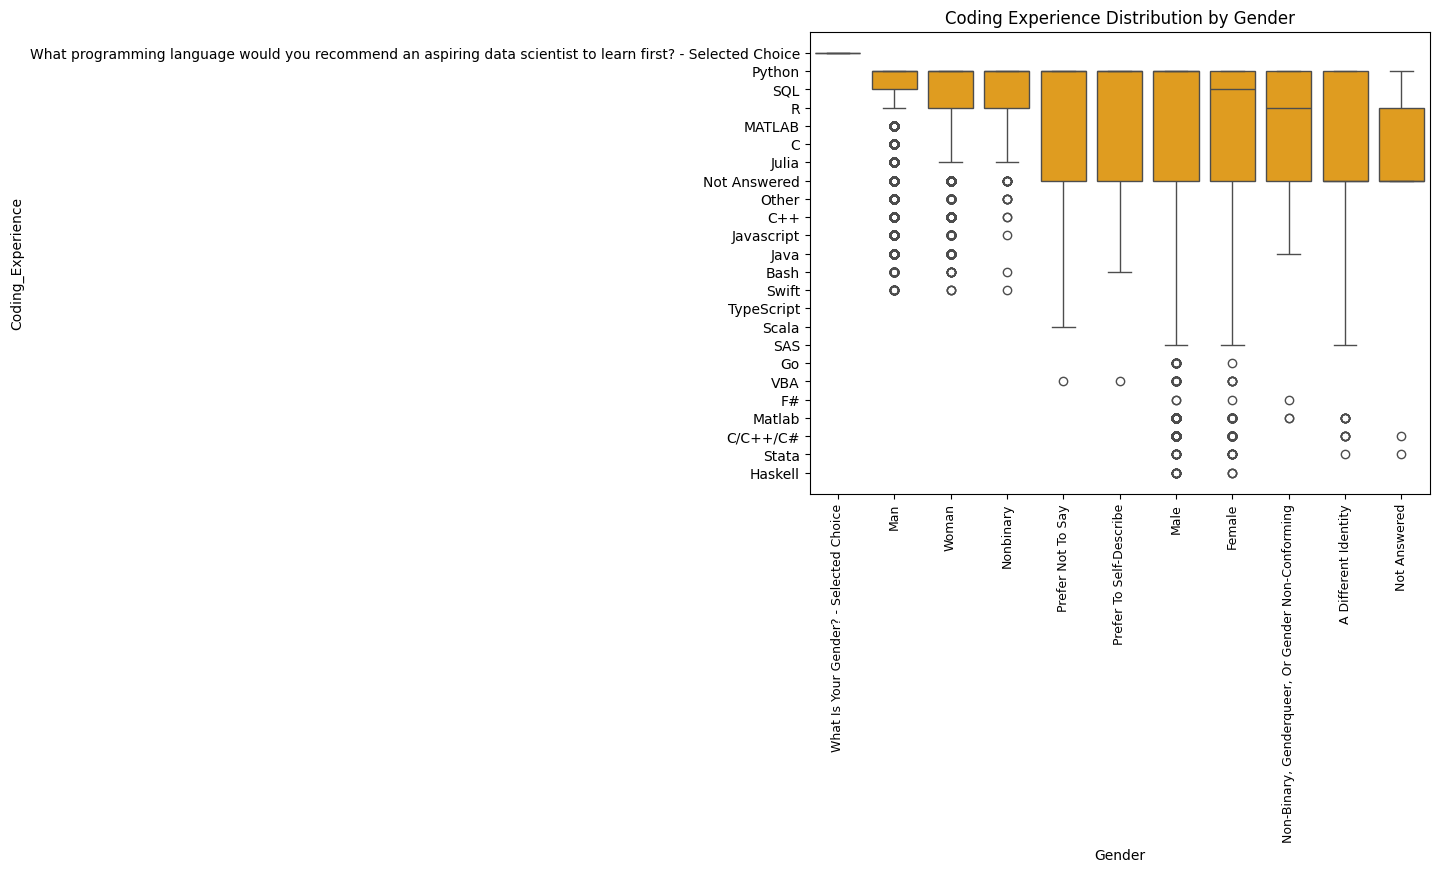

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="Coding_Experience", data=df, color="Orange")
plt.xticks(rotation=90, ha="center", fontsize=9)  # rotate x-axis labels
plt.title("Coding Experience Distribution by Gender")
plt.tight_layout()
plt.show()

### Visualization: Age Distribution by Job Title
Generate a boxplot to compare the age distribution across different job titles.

/var/folders/y3/f1z_df5s1pl46lm6gnhgz_lc0000gn/T/ipykernel_11698/1265150841.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


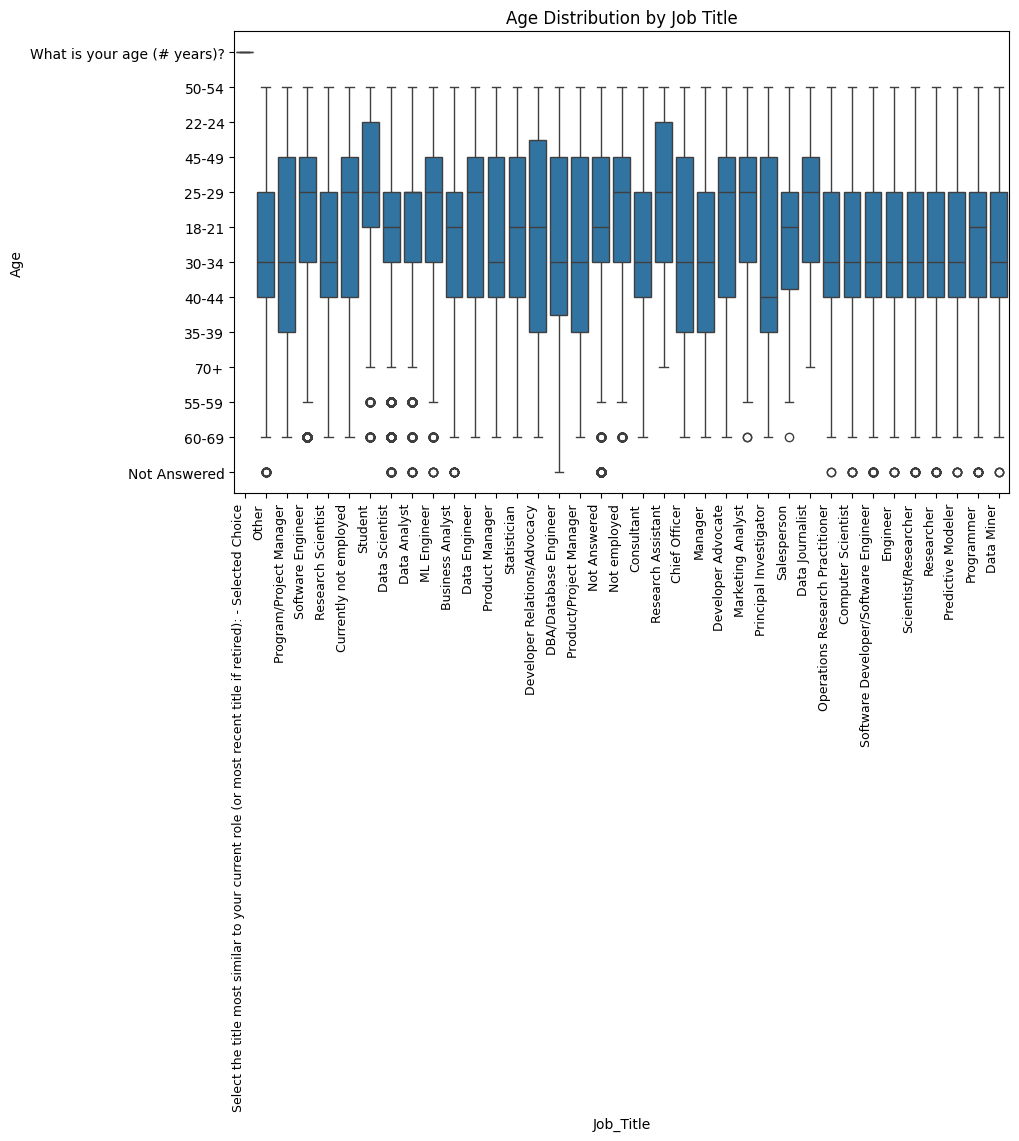

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Job_Title", y="Age", data=df)
plt.xticks(rotation=90, ha="right", fontsize=9)
plt.title("Age Distribution by Job Title")
plt.tight_layout()
plt.show()

### Visualization: Programming Language by Education Level
Plot the most popular programming language (`Q7_Part_1`) grouped by education level using a countplot.

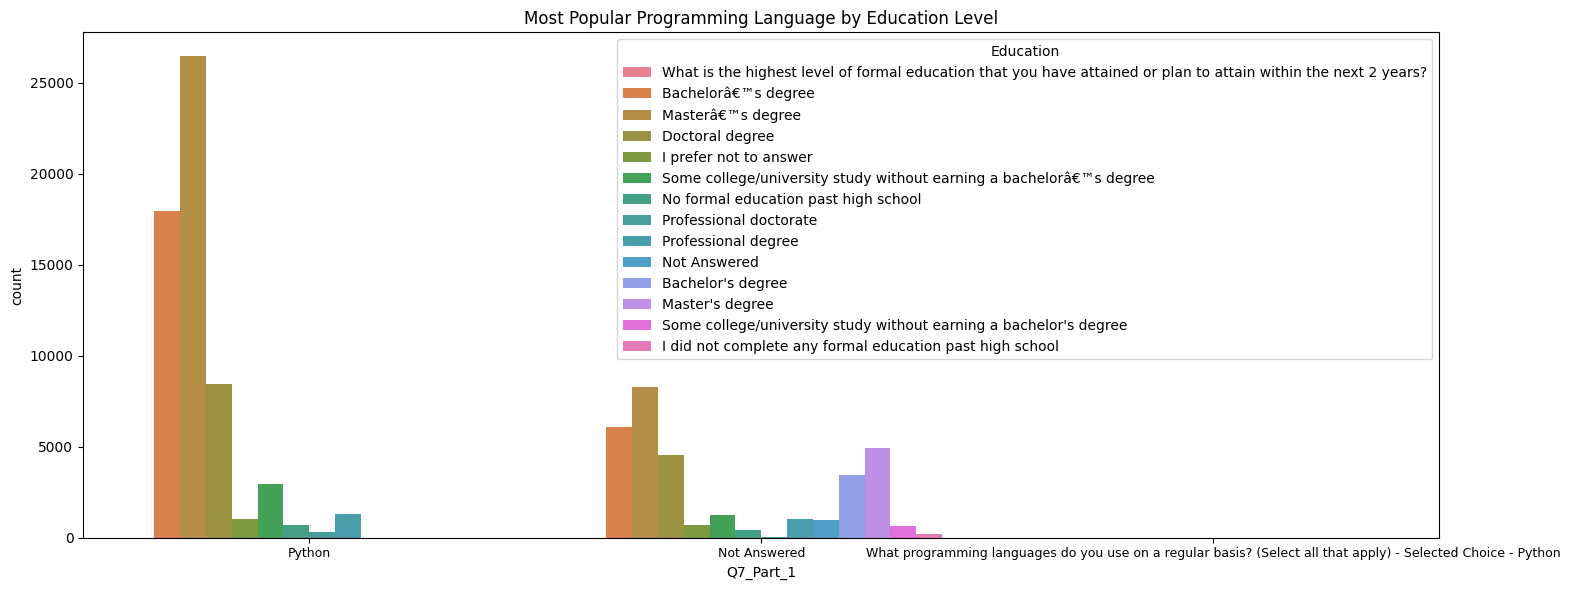

In [28]:
plt.figure(figsize=(16,6))  # wider figure
sns.countplot(
    x="Q7_Part_1", 
    hue="Education", 
    data=df, 
    order=df["Q7_Part_1"].value_counts().index
)

plt.xticks(rotation=0, ha="center", fontsize=9)  # keep labels straight
plt.title("Most Popular Programming Language by Education Level")
plt.tight_layout()
plt.show()

### Visualization: Coding Experience by Top Job Titles
Filter the top 8 most common job titles and visualize coding experience for each group.

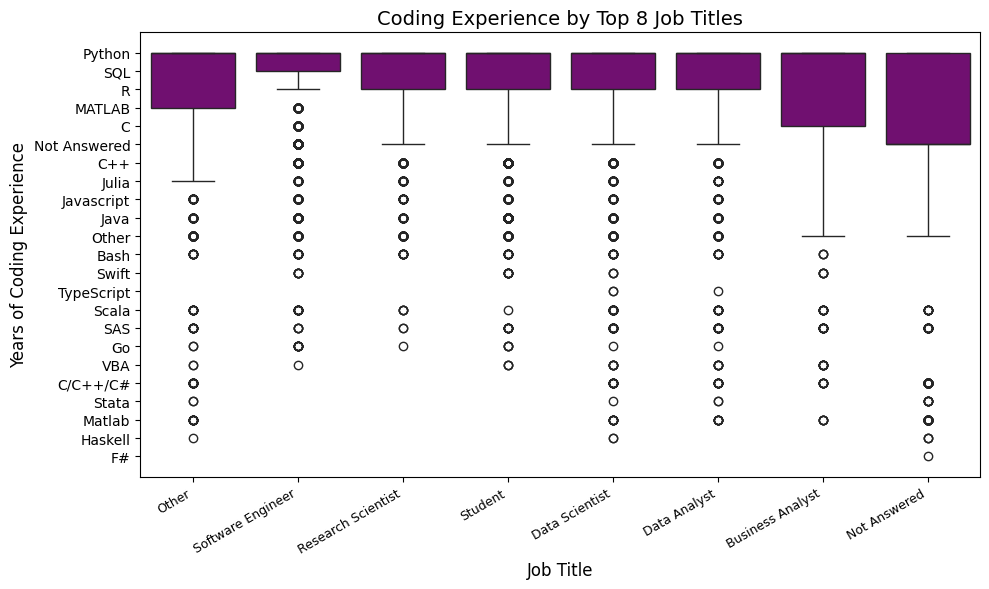

In [48]:
top_jobs = df["Job_Title"].value_counts().head(8).index
df_top_jobs = df[df["Job_Title"].isin(top_jobs)]

plt.figure(figsize=(10,6))
sns.boxplot(x="Job_Title", y="Coding_Experience", data=df_top_jobs, color="Purple")

plt.xticks(rotation=30, ha="right", fontsize=9)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Years of Coding Experience", fontsize=12)
plt.title("Coding Experience by Top 8 Job Titles", fontsize=14)

plt.tight_layout()
plt.show()

### Visualization: Top 8 Programming Languages
Show the most frequently recommended programming languages and their counts, with wrapped labels for readability.

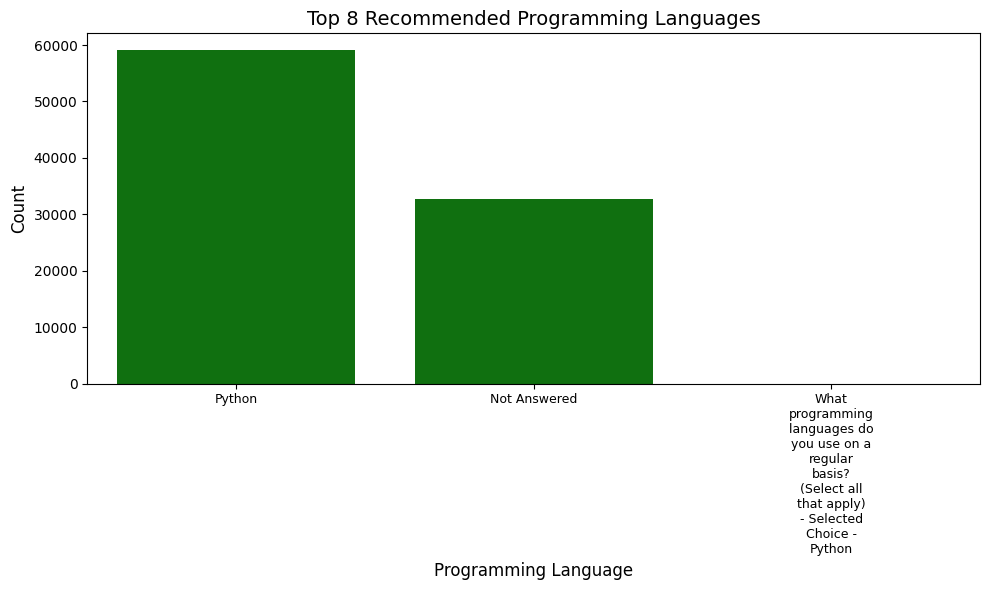

In [36]:
import textwrap

top_langs = df["Q7_Part_1"].value_counts().head(8).index
df_top_langs = df[df["Q7_Part_1"].isin(top_langs)]

plt.figure(figsize=(10,6))
sns.countplot(x="Q7_Part_1", data=df_top_langs, order=top_langs, color="green")

# Wrap long labels
labels = [textwrap.fill(label, 12) for label in top_langs]  # 12 chars per line
plt.xticks(ticks=range(len(top_langs)), labels=labels, rotation=0, ha="center", fontsize=9)

plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 8 Recommended Programming Languages", fontsize=14)

plt.tight_layout()
plt.show()